# **Churn Modelling**

## **Importing Libraries**

In [1]:
#dataframe and manipulation libraries
import pandas as pd
import numpy as np
#visualizing libraries
import seaborn as sns
#feature necoding library
from sklearn.preprocessing import LabelEncoder
#test trains split library
from sklearn.model_selection import train_test_split
# feature scaling library
from sklearn.preprocessing import MinMaxScaler
#for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV
# keras and tensorflow framework libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# metrics report
from sklearn.metrics import classification_report,confusion_matrix

## **Churn Modelling Dataset**

In [2]:
data= pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **EDA**

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
le= LabelEncoder()
le.fit(data["Geography"].values)
data["Geography"]= le.transform(data["Geography"].values)
le.fit(data["Gender"].values)
data["Gender"]= le.transform(data["Gender"].values)

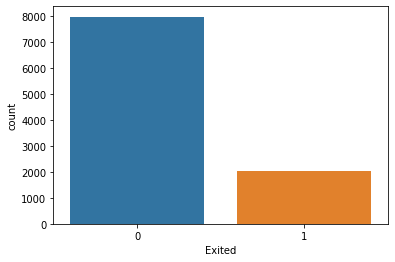

In [8]:
sns.countplot(x='Exited',data=data)

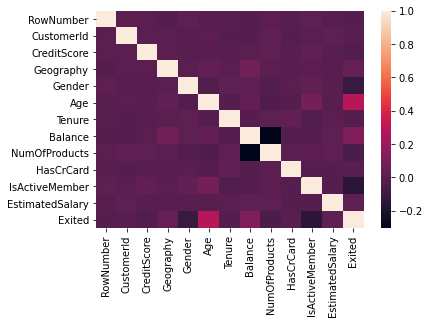

In [9]:
sns.heatmap(data.corr())

In [10]:
data.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
Gender            -0.106512
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Geography          0.035943
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data= data.drop("RowNumber", axis=1)
data= data.drop("CustomerId", axis=1)
data= data.drop("Surname", axis=1)

## **Preparing Data for Modelling**

In [13]:
X = data.drop('Exited',axis=1).values
y = data['Exited'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### **Feature Scaling**

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Modelling**

In [16]:
X_train.shape

(8000, 10)

In [17]:
X_test.shape

(2000, 10)

### Hyperparameter Tunining

In [18]:
stopper = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=30)

In [19]:
def model_create(optimizer= 'adam', dropout_rate= 0.0, learn_rate=0.0001):
  model = Sequential()
  model.add(Dense(units=10,activation='relu'))  
  model.add(Dense(units=7,activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=7,activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=7,activation='relu'))
  model.add(Dropout(dropout_rate))  
  model.add(Dense(units=1,activation='sigmoid'))
  # For a binary classification problem
  optimizer=tf.keras.optimizers.Adam(lr= learn_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [20]:
model = KerasClassifier(build_fn=model_create, epochs=1000, verbose=0)

In [21]:
%%time

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
learn_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(optimizer=optimizer, learn_rate=learn_rate, dropout_rate= dropout_rate)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=2, n_iter=30, random_state=11)
fit_params = dict(callbacks=[stopper])
grid_result = grid.fit(X_train, y_train, **fit_params)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 00123: early stopping
Best: 0.856000 using {'optimizer': 'Adam', 'learn_rate': 0.01, 'dropout_rate': 0.0}
0.798250 (0.003250) with: {'optimizer': 'Adam', 'learn_rate': 0.5, 'dropout_rate': 0.5}
0.798250 (0.003250) with: {'optimizer': 'Adagrad', 'learn_rate': 0.0001, 'dropout_rate': 0.5}
0.798250 (0.003250) with: {'optimizer': 'Adagrad', 'learn_rate': 0.5, 'dropout_rate': 0.1}
0.808875 (0.007375) with: {'optimizer': 'Adagrad', 'learn_rate': 0.001, 'dropout_rate': 0.4}
0.798250 (0.003250) with: {'optimizer': 'Adam', 'learn_rate': 0.0001, 'dropout_rate': 0.2}
0.821250 (0.026250) with: {'optimizer': 'RMSprop', 'learn_rate': 0.001, 'dropout_rate': 0.1}
0.798250 (0.003250) with: {'optimizer': 'Adam', 'learn_rate': 0.05, 'dropout_rate': 0.5}
0.798250 (0.003250) with: {'optimizer': 'SGD', 'learn_rate': 0.1, 'dropout_rate': 0.4}
0.851500 (0.004250) with: {'optimizer': 'RMSprop', 'learn_rate': 0.01, 'dropout_rate': 0.0}
0.798250 (0.003250) with: {'optimizer': 'Adam', 'learn_rate': 0.05, 'd

### Final Architecture

In [22]:
model = Sequential()
model.add(Dense(units=10, activation='relu'))  
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.01))


## **Training**

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [24]:
%%time
model.fit(x=X_train, y=y_train, epochs=1000,validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.5242 - val_loss: 0.4868
Epoch 2/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4381 - val_loss: 0.4317
Epoch 3/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - val_loss: 0.4161
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4267 - val_loss: 0.4084
Epoch 5/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4130 - val_loss: 0.4242
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4007 - val_loss: 0.4046
Epoch 7/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.3909
Epoch 8/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4103 - val_loss: 0.3932
Epoch 9/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3896 - val_loss: 0.3802
Epoch 10/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.390

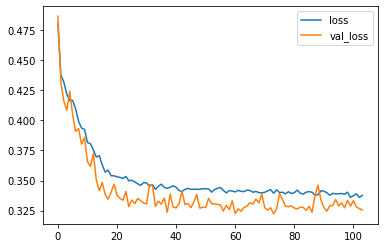

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 77        
_________________________________________________________________
dropout_3 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_4 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_5 (Dropout)          (None, 7)                

## **Model Evaluation**

In [27]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.84      0.45      0.58       423

    accuracy                           0.86      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
print(confusion_matrix(y_test,predictions))

[[1540   37]
 [ 234  189]]


## **Predicting on New Values**

In [29]:
prediction =model.predict_classes([[0,499,1,39,3,50000,2,1,1,60000]])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
print(prediction)

[[0]]
